## Imports

In [128]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Constants

In [129]:
HEADER_LEN = 6
KEEP = 1
COLORS = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#1a55FF']
CURRENT_WORKING_DIR = os.getcwd()
print(CURRENT_WORKING_DIR)

#todo make dynamic
os.chdir('D:/Switchdrive/Uni/Thesis/code/HuberNicolas/MTDPolicy/')



CAT = {
    'usr': 'total-cpu-usage',
    'sys': 'total-cpu-usage',
    'idl': 'total-cpu-usage',
    'wai': 'total-cpu-usage',
    'hiq': 'total-cpu-usage',
    'siq': 'total-cpu-usage',

    'used' : 'memory usage',
    'buff' : 'memory usage',
    'cache' : 'memory usage',
    'free' : 'memory usage',

    'files': 'filesystem',
    'inodes' : 'fileystem',

    'read' : 'dsk/total',
    'writ' : 'dsk/total',
    'reads' : 'dsk/total',
    'writs' : 'dsk/total',

    'recv' : 'net/eth0',
    'send' : 'net/eth0',

    'lis' : 'tcp sockets',
    'act' : 'tcp sockets',
    'syn' : 'tcp sockets',
    'tim' : 'tcp sockets',
    'clo' : 'tcp sockets',

    'int' : 'system',
    'csw' : 'system',

    'run' : 'procs',
    'blk' : 'procs',
    'new' : 'procs'
}

CAT_NAMES = ['total-cpu-usage', 'memory-usage', 'filesystem', 'dsk-total1', 'dsk-total2', 'net-eth0', 'tcp sockets', 'system', 'procs',]

COL_NAMES = [
    # total-cpu-usage
    'usr: CPU usage by user processes [%]', 
    'sys: CPU usage by system processes [%]',
    'idl: Number of idle processes [#]',
    'wai: Number of waiting processes [#]',
    'hiq: Number of hard interrupts [#]',
    'siq: Number of soft interrupts [#]',
    # memory usage
    # https://www.tecmint.com/dstat-monitor-linux-server-performance-process-memory-network/
    # https://linuxtect.com/linux-dstat-command-monitor-linux-performance-and-resource-usage/
    # https://www.thegeekdiary.com/understanding-proc-meminfo-file-analyzing-memory-utilization-in-linux/
    # /proc/meminfo
    'used: Amount of used memory [Bytes]', # / 1024 = KB
    'buff: Amount of buffered memory [Bytes]', # / 1024 / 1024 = MB
    'cache: Amount of cached memory [Bytes]',
    'free: Amount of free memory [Bytes]',

    # filesystem
    # https://www.linuxquestions.org/questions/linux-general-1/proc-sys-fs-file-nr-57646/
    # /proc/sys/fs/file-nr
    'files: Number of allocated file handles [#]',
    'inodes: Number of used file handles [#]',

    # dsk/total
    'read: Amount of read bytes on disk [Bytes]', # not 100% sure
    'writ: Amount of written bytes on disk [Bytes]', # / 1024 = KB

    # dsk/total
    'reads: Number of read operations on disk [#]',
    'writs: Number of write operations on disk [#]',
    
    # net/eth0
    'recv: Amount of received bytes on eth0 [B]', # /1024 = k
    'send: Amount of received bytes on eth0 [B]',

    # tcp sockets
    # http://karunsubramanian.com/network/what-is-syn_sent-socket-status/
    # /proc/net/tcp
    # /proc/net/tcp6
    'lis: Number of TCP connections with status "listening" [#]', 
    'act: Number of TCP connections with status "established" (active) [#]',
    'syn: Number of TCP connections with status "syn_sent", "syn_receive" or "last_ack" [#]',
    'tim: Number of TCP connections with status "waiting"[#]',
    'clo: Number of TCP connections with status "fin-wait1/2", "close/_wait" or "closign" (closed) [#]',

    # system
    # https://www.tecmint.com/dstat-monitor-linux-server-performance-process-memory-network/
    'int: Number of interrupts [#]', 
    'csw: Number of ontext switches [#]', 

    # procs
    # /proc/stat
    'run: Number of processes with status "running" [#]', 
    'blk: Number of processes with status "blocked" [#]',
    'new: Number of processes with status "new" [#]' 
]
PERIOD = 60

D:\Switchdrive\Uni\Thesis\code\HuberNicolas\MTDPolicy


## Load csv files

### Loading

In [130]:
files = glob.glob('data\csv\*.csv')
print(files)


# create dataframes for each .csv
dfs = []
header = None
for f in files:
    # create header
    if header is None:
        header = pd.read_csv(f, skiprows=HEADER_LEN)
        header = list(header.columns.values)
    # read and append
    dff = pd.read_csv(f, skiprows = HEADER_LEN + 1, header = None) # read csv
    #dff = dff.iloc[:, :-1] # remove last row
    dff.columns = header # append header
    dfs.append(dff) # append to list of dfs
    
# append all dataframes dff to one dataframe df
df = pd.concat(dfs, ignore_index=True)



['data\\csv\\2022-07-20-11-37-15-log.csv', 'data\\csv\\2022-07-20-11-37-45-log.csv', 'data\\csv\\2022-07-20-11-38-15-log.csv', 'data\\csv\\2022-07-20-11-38-46-log.csv', 'data\\csv\\2022-07-20-11-39-16-log.csv', 'data\\csv\\2022-07-20-11-39-46-log.csv', 'data\\csv\\2022-07-20-11-40-16-log.csv', 'data\\csv\\2022-07-20-11-40-47-log.csv', 'data\\csv\\2022-07-20-11-41-17-log.csv', 'data\\csv\\2022-07-20-11-41-47-log.csv', 'data\\csv\\2022-07-20-11-42-17-log.csv', 'data\\csv\\2022-07-20-11-42-47-log.csv', 'data\\csv\\2022-07-20-11-43-18-log.csv', 'data\\csv\\2022-07-20-11-43-48-log.csv', 'data\\csv\\2022-07-20-11-44-18-log.csv', 'data\\csv\\2022-07-20-11-44-48-log.csv', 'data\\csv\\2022-07-20-11-45-18-log.csv', 'data\\csv\\2022-07-20-11-45-49-log.csv', 'data\\csv\\2022-07-20-11-46-19-log.csv', 'data\\csv\\2022-07-20-11-46-49-log.csv', 'data\\csv\\2022-07-20-11-47-19-log.csv', 'data\\csv\\2022-07-20-11-47-49-log.csv', 'data\\csv\\2022-07-20-11-48-20-log.csv', 'data\\csv\\2022-07-20-11-48-50-l

### Postprocessing

In [131]:
# fix year
df['time'] = '2022-' + df['time'].astype(str)
df['time'] = pd.to_datetime(df['time'],format= '%Y-%d-%m %H:%M:%S')
# sort and reindex
df = df.sort_values(by='time')
df = df.iloc[::KEEP] # only take every KEEPth-entry
df = df.reset_index(drop=True)
df.set_index('time', inplace=True)

In [132]:
# save file
startDate = df.iloc[0].name.strftime('%Y-%m-%d')
startTime = df.iloc[0].name.strftime('%X')
endDate = df.iloc[-1].name.strftime('%Y-%m-%d')
endTime = df.iloc[-1].name.strftime('%X')
name = "{}-{}_{}-{}({}).csv".format(startDate.replace('-',''), startTime.replace(':',''), endDate.replace('-',''), endTime.replace(':',''), str(df.shape[0]))

df.to_csv(name, index=False, header=True)

In [133]:
# sanity check
print(header)
print(df.columns.to_list())
header.pop(0)
print(header == df.columns.to_list())

['time', 'usr', 'sys', 'idl', 'wai', 'hiq', 'siq', 'used', 'buff', 'cach', 'free', 'files', 'inodes', 'read', 'writ', 'reads', 'writs', 'recv', 'send', 'lis', 'act', 'syn', 'tim', 'clo', 'int', 'csw', 'run', 'blk', 'new']
['usr', 'sys', 'idl', 'wai', 'hiq', 'siq', 'used', 'buff', 'cach', 'free', 'files', 'inodes', 'read', 'writ', 'reads', 'writs', 'recv', 'send', 'lis', 'act', 'syn', 'tim', 'clo', 'int', 'csw', 'run', 'blk', 'new']
True


## Information

In [134]:
col_types = df.dtypes
print(col_types)

print("# datapoints (rows) = {}".format(df.shape[0]))
print("# columns = {}".format(df.shape[1]))
print("# total cells (Size) = Shape[0] x Shape[1] = {}".format(df.size))
print("Shape = {}".format(df.shape))

usr       float64
sys       float64
idl       float64
wai       float64
hiq       float64
siq       float64
used      float64
buff      float64
cach      float64
free      float64
files     float64
inodes    float64
read      float64
writ      float64
reads     float64
writs     float64
recv      float64
send      float64
lis       float64
act       float64
syn       float64
tim       float64
clo       float64
int       float64
csw       float64
run       float64
blk       float64
new       float64
dtype: object
# datapoints (rows) = 930
# columns = 28
# total cells (Size) = Shape[0] x Shape[1] = 26040
Shape = (930, 28)


## Visualization

time
2022-07-20 11:37:15   NaN
2022-07-20 11:37:16   NaN
2022-07-20 11:37:17   NaN
2022-07-20 11:37:18   NaN
2022-07-20 11:37:19   NaN
                       ..
2022-07-20 11:52:17   NaN
2022-07-20 11:52:18   NaN
2022-07-20 11:52:19   NaN
2022-07-20 11:52:20   NaN
2022-07-20 11:52:21   NaN
Name: usr-mean, Length: 930, dtype: float64
time
2022-07-20 11:37:15    3.781117
2022-07-20 11:37:16    3.781117
2022-07-20 11:37:17    3.781117
2022-07-20 11:37:18    3.781117
2022-07-20 11:37:19    3.781117
                         ...   
2022-07-20 11:52:17         NaN
2022-07-20 11:52:18         NaN
2022-07-20 11:52:19         NaN
2022-07-20 11:52:20         NaN
2022-07-20 11:52:21         NaN
Name: usr-mean, Length: 930, dtype: float64


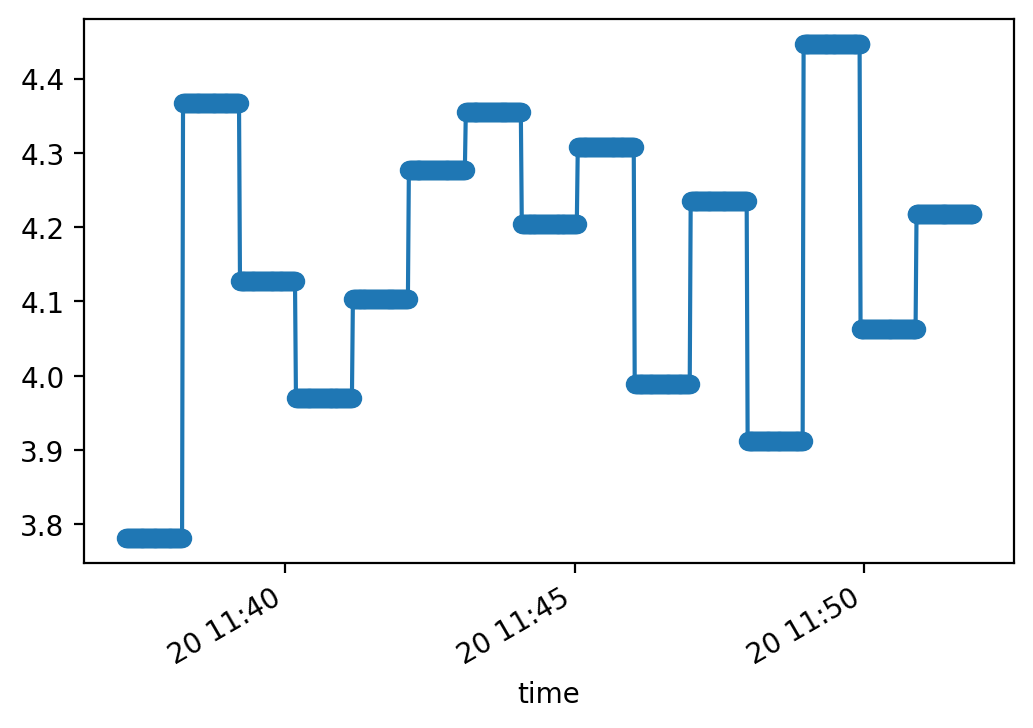

In [138]:
#
#https://stackoverflow.com/questions/57595661/non-overlapping-rolling-windows-in-pandas-dataframes
#print(df['usr'])
#print(df['usr'].rolling(5).mean()[5-1::5])¨
WINDOW = 60
df['usr-mean']  = df['usr'].rolling(WINDOW).mean()[WINDOW-1::WINDOW]
print(df['usr-mean'])
df['usr-mean'].bfill(inplace = True)
print(df['usr-mean'])



plt.figure(dpi=200)
df['usr-mean'].plot(marker="o")
plt.show()



<Figure size 5000x3600 with 0 Axes>

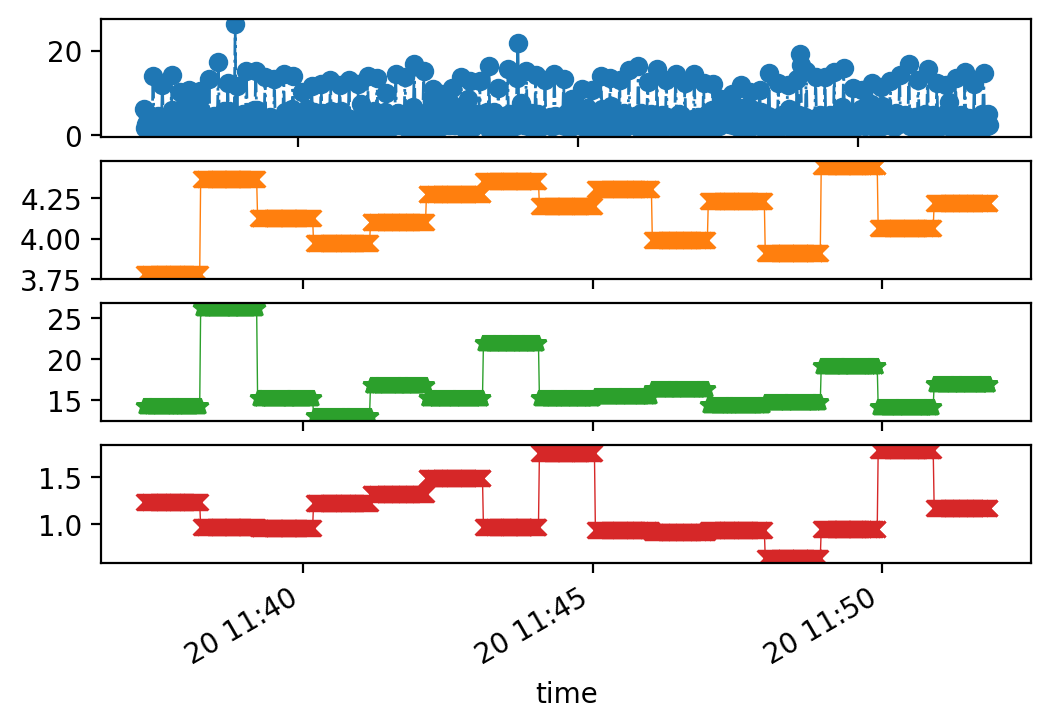

<Figure size 5000x3600 with 0 Axes>

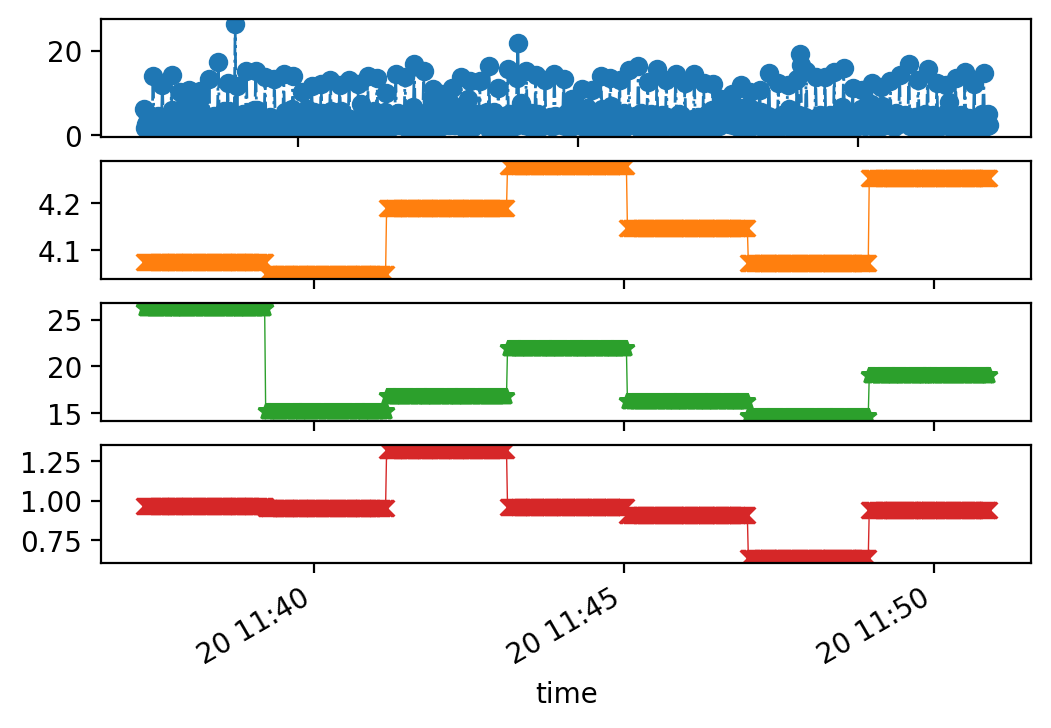

In [166]:
WINDOWS = [1, 5, 6, 10, 20, 30, 60, 120]
WINDOWS = [60, 120]

for window in WINDOWS:
    plt.figure(figsize=(25,18), dpi=200)
    df['usr-mean']  = df['usr'].rolling(window).mean()[window-1::window]
    df['usr-mean'].bfill(inplace = True)
    df['usr-max']  = df['usr'].rolling(window).max()[window-1::window]
    df['usr-max'].bfill(inplace = True)
    df['usr-min']  = df['usr'].rolling(window).min()[window-1::window]
    df['usr-min'].bfill(inplace = True)
    plt.figure(dpi=200)
    plt.subplot(4, 1, 1)  
    df['usr'].plot(marker="o", color=COLORS[0], linestyle='-.', linewidth=1)
    plt.subplot(4, 1, 2)  
    df['usr-mean'].plot(marker="x", color=COLORS[1], linestyle='-', linewidth=0.5)
    plt.subplot(4, 1, 3)  
    df['usr-max'].plot(marker="*", color=COLORS[2], linestyle='-', linewidth=0.5)
    plt.subplot(4, 1, 4)  
    df['usr-min'].plot(marker="x", color=COLORS[3], linestyle='-', linewidth=0.5)
    plt.show()

plt.figure(dpi=200)
      
df['usr'].plot(marker="o", color=COLORS[0], linestyle='-.', linewidth=1)
df['usr-mean'].plot(marker="x", color=COLORS[1], linestyle='-', linewidth=0.5)

df['usr-max'].plot(marker="*", color=COLORS[2], linestyle='-', linewidth=0.5) 
df['usr-min'].plot(marker="x", color=COLORS[3], linestyle='-', linewidth=0.5)
plt.show()

